In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Database01/Train_set'

test_path= '/content/drive/MyDrive/Colab Notebooks/Database/Test_set'

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (224,224, 3), 
                                include_top = False,
                                weights = 'imagenet')

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
last_layer = pre_trained_model.get_layer('mixed6') 
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense  (2, activation='softmax')(x)           
model = Model( pre_trained_model.input, x) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy','AUC'])


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator( rescale = 1.0/255)


train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Database01/Train_set',
                                                    batch_size = 16,
                                                    target_size = (224, 224))     

validation_generator =  test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Database01/Test_set',
                                                          batch_size  = 16,
                                                          shuffle=False,
                                                          target_size = (224,224))

Found 5582 images belonging to 2 classes.
Found 1154 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint
call = myCallback()
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/shalini.h5', monitor='val_accuracy',verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
r = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=47,
  callbacks=[checkpoint,call])

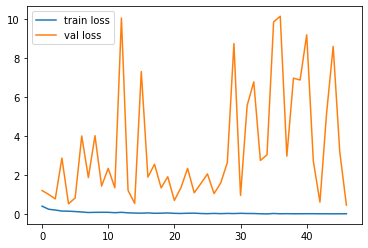

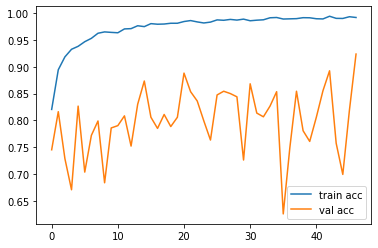

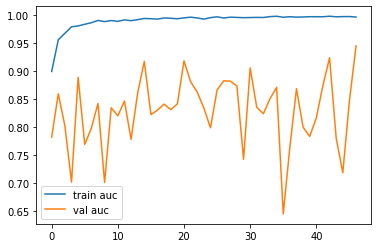

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

plt.plot(r.history['auc'], label='train auc')
plt.plot(r.history['val_auc'], label='val auc')
plt.legend()
plt.show()
plt.savefig('AUC')

In [ ]:
y_pred = model.predict(validation_generator)
y_pred

array([[1.0000000e+00, 4.0101096e-19],
       [1.0000000e+00, 7.6105621e-23],
       [1.0000000e+00, 2.7040324e-21],
       ...,
       [5.7499715e-08, 1.0000000e+00],
       [7.7915442e-04, 9.9922085e-01],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

[0 0 0 ... 1 1 1]


[[565  12]
 [ 76 501]]


Text(0.5, 117.59999999999997, 'Predicted')

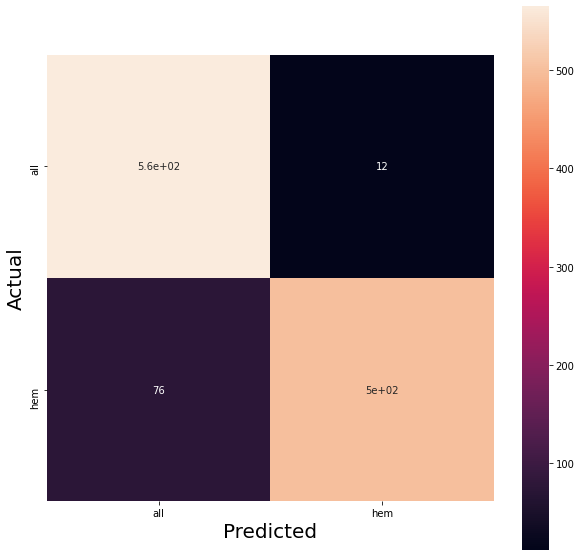

In [ ]:
import os,os.path
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

label=[]
types=['all','hem']
path='/content/drive/MyDrive/Colab Notebooks/Database01/Test_set'
direc= os.path.join(path)
for id,td in enumerate(types):
  for file in os.listdir(os.path.join(direc,td)):
    label.append(['{}/{}'.format(td,file),id,td])

t=pd.DataFrame(label,columns=['Image','class ID','types'])
t.head()
y_true= t['class ID'].values
y_true
cm=confusion_matrix(y_true,y_pred)
print(cm)
plt.figure(figsize=(10,10))
s=sns.heatmap(cm,annot=True, square=True, xticklabels=types,yticklabels=types)
s.set_ylabel('Actual', fontsize=20)
s.set_xlabel('Predicted',fontsize=20)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       577
           1       0.98      0.87      0.92       577

    accuracy                           0.92      1154
   macro avg       0.93      0.92      0.92      1154
weighted avg       0.93      0.92      0.92      1154

